# Measurement and Uncertainty

This section is a summary of some key points that are relevant to this course taken from the UCT Physics laboratory manual {% cite phy-gum %}.

## Measurements
When taking a physical measurement of a quantity (the **measurand**), the value you acquire is only a best approximation of the "true value" of the quantity (if that even exists for the given measurement). 

Many factors, from the precision of your apparatus to random or systematic noise, introduce some form of **uncertainty** to your measurand. That is a quantifiable measure of the interval in which the "true value" for your measurand may lie with knowledge of the probability of it lying in that interval. <!--- Needs editing --->

## Sources of Uncertainty in Computing

Seeing as we are working with computers, we don't have measurement apparatus to worry about. There are, however, other sources to consider.

### Precision of Data Values
Floating point numbers can only approximately represent a real numbers and have a finite precision due to having finite memory available.

Although we generally won't have to worry about the precision of our floats in this course. Be careful when preforming numerical operations (especially division) that intermediate values don't become too small. <!--- ellaborate: enlarge inaccuracies by multiplying etc -->

### Background Processes
If you are using a personal computer with an operating system there are always going to be background processes being preformed. These processes (however light they may be) are competing with your programs for resources.

This is especially relevant when you are running benchmarks for your code (time it takes to complete execution, memory use, etc.).

This form of uncertainty can be quite noisy and thus treated as **Type A** uncertainty (see the section below).<!--- Type A -->

### Error or Approximations in Numerical Solutions
Every numerical solution or simulation contains some approximation. This leads to uncertainty in the results you've acquired. How you handle this uncertainty depends on the particular method in question.

## Type A Uncertainty

Sometimes you encounter fluctuation in your measurements of a single measurand. If this dispersion is unavoidable, the recommended approach is to take a data set of repeated measurements.

In many cases, given enough data points, the data will appear to follow a Gaussian probability distribution function (plot the data in a histogram if you're not sure).

Here we will denote the data set as ${x_i}$ where $i = 1, 2, 3, \dots, N$ (there are $N$ data points). <!--- Show a typical histogram for this data --->

The Gaussian probability distribution function is:

$$
p(x) = \frac{1}{\sigma \sqrt{2 \pi}}~\exp\bigg(-\frac{1}{2}\Big(\frac{x - \mu}{\sigma}\Big)^2\bigg)
$$

where $\exp$ is the natural exponential function, $x$ is a possible value of a data point, $\mu$ is the first moment of the distribution and $\sigma^2$ is the second moment of the distribution.

<!--- Mention the approximation using data later  or rather that the histogram should roughly match this-->

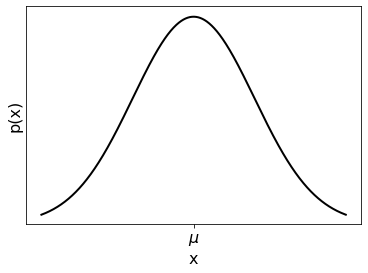

In [39]:
##Plot of a Gaussian (hide input)
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1
x = np.linspace(-2.5*sigma, 2.5*sigma, 1000)
xticks = [0]
xlabels = [r'$\mu$']
fs = 16

def gauss(x, mean, std_dev):
    return 1/std_dev/np.sqrt(2*np.pi) * np.exp(-0.5*(x - mean)**2/std_dev/std_dev)

fig, ax = plt.subplots()

ax.plot(x, gauss(x, mu, sigma), color = 'black', linewidth = 2)


ax.set_ylim([0, 1.05*gauss(mu, mu, sigma)])

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize = fs)
ax.set_yticks([])

ax.set_xlabel('x', fontsize = fs)
ax.set_ylabel('p(x)', fontsize = fs)

plt.show()

As you can see illustrated in the figure above, the Gaussian peaks around $x = \mu$. We could say the most likely value of $x$ lies in an interval around $\mu$ (continuous probability distribution functions represent probability densities).

<!---
In our histogram of the data we expect the bin with the highest frequency to contain $\mu$.
--->

For Gaussian distributed data, such as ${x_i}$, we can approximate $\mu$ using the arithmetic mean, $\bar{x}$:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

This value will be taken as our **best approximation** of the value of the measurand.

$\sigma^2$ can be approximated by the variance of the data:

$$
\frac{1}{N-1}\sum_{i=1}^{N} (x - \bar{x})^2
$$

The variance gives us a measure of the spread of the data (it is essentially the average square distance of each data point from the mean). Note the division by $N-1$ and not $N$.

Of more immediate use to us is the square root of the variance, or the **experimental standard deviation** $s(d)$:

$$
s(x) = \sqrt{\frac{1}{N-1} \sum_{i = 1}^{N} (x - \bar{x})^2}
$$

But how do we use $s(x)$, a measure of the spread of our data ${x_i}$, to determine the uncertainty of our best approximation of the value of the measurand $\bar{x}$?

### Coverage Probability

Now we need to consider the uncertainty of this best approximation. The uncertainty will represent an interval around our best approximation of the value of the measurand in which we have some confidence that the "true value" lies.

We can quantify this interval by looking back at our pdf. If we take the area under $p(x)$ for a given interval that tells us the probability of finding $x$ in that interval.

For example, taking an interval of $[\mu - \sigma, \mu + \sigma]$ (or $\mu \pm \sigma$) gives us a probability of $68\%$ (or rather the value of the area is 0.68). That is the probability of finding any $x$ value inside that interval. <!--- Show gaussians with different sigmas to illustrate how it characterises the spread of data --->

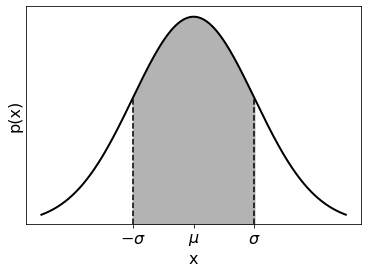

In [38]:
##Plot of a Gaussian with 68% confidence area shaded (hide input)
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1

xticks = [0, -sigma, sigma]
xlabels = [r'$\mu$', r'$-\sigma$', r'$\sigma$']
fs = 16

x = np.linspace(-2.5*sigma, 2.5*sigma, 1000)
x_area = np.linspace(-sigma, sigma, 500)

def gauss(x, mean, std_dev):
    return 1/std_dev/np.sqrt(2*np.pi) * np.exp(-0.5*(x - mean)**2/std_dev/std_dev)

fig, ax = plt.subplots()

ax.fill_between(x_area, gauss(x_area, mu, sigma), color = '0.7')

ax.plot([-sigma, -sigma], 
        [0, gauss(-sigma, mu, sigma)], 
        color = 'black', ls = '--')
ax.plot([sigma, sigma], 
        [0, gauss(sigma, mu, sigma)], 
        color = 'black', ls = '--')

ax.plot(x, gauss(x, mu, sigma), color = 'black', linewidth = 2)

ax.set_ylim([0, 1.05*gauss(mu, mu, sigma)])
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize = fs)
ax.set_yticks([])

ax.set_xlabel('x', fontsize = fs)
ax.set_ylabel('p(x)', fontsize = fs)

plt.show()

This interval is often used for quoting the coverage probability of a measured variable $x$. Sometimes an interval of $\mu \pm 2\sigma$ is used, which gives us a coverage probability of $95%$ (though normally the narrower interval of $1\sigma$ is preferred).

Note that, for a Gaussian distribution, $100\%$ coverage requires an infinitely large interval and is thus meaningless.

Remember that $\sigma$ characterizes the width of the Gaussian, so this interval is also an indication of the spread of the measured data (illustrated below, each region has an area of 0.68 and the scale is maintained):

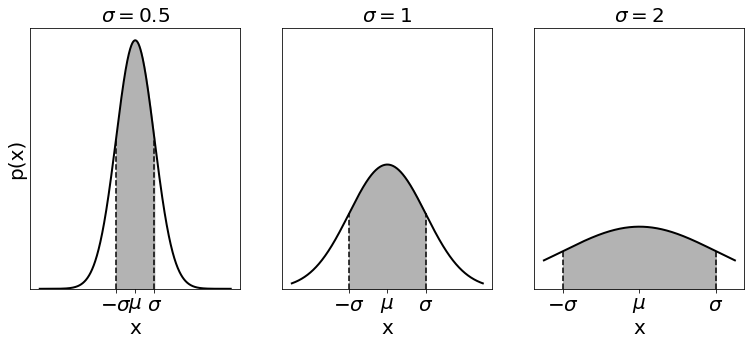

In [79]:
##Plot of a Gaussians with 68% confidence area shaded (hide input)
#Come back and improve this (set fig size, ect)
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigmas = [0.5, 1, 2]

xlabels = [r'$\mu$', r'$-\sigma$', r'$\sigma$']
fs = 20

x = np.linspace(-2.5, 2.5, 1000)


def gauss(x, mean, std_dev):
    return 1/std_dev/np.sqrt(2*np.pi) * np.exp(-0.5*(x - mean)**2/std_dev/std_dev)

fig, ax = plt.subplots(1, 3, sharey = True , figsize = (12.8, 4.8))

for i,sigma in enumerate(sigmas):
    x_area = np.linspace(-sigma, sigma, 500)

    ax[i].fill_between(x_area, gauss(x_area, mu, sigma), color = '0.7')

    ax[i].plot([-sigma, -sigma], 
            [0, gauss(-sigma, mu, sigma)], 
            color = 'black', ls = '--')
    ax[i].plot([sigma, sigma], 
            [0, gauss(sigma, mu, sigma)], 
            color = 'black', ls = '--')

    ax[i].plot(x, gauss(x, mu, sigma), color = 'black', linewidth = 2)

    ax[i].set_xticks([0, -sigma, sigma])
    ax[i].set_xticklabels(xlabels, fontsize = fs)

    ax[i].set_xlabel('x', fontsize = fs)
    ax[i].set_title(f'$\\sigma = {sigma}$', fontsize = fs)

ax[0].set_ylim([0, 1.05*gauss(mu, mu, min(sigmas))])
ax[0].set_ylabel('p(x)', fontsize = fs)
ax[0].set_yticks([])

plt.show()

So how do we turn an interval with a coverage probability of $68\%$ into an uncertainty? 

Firstly, for our data set of measured $x_i$ values, the value of our measurand is approximated as the arithmetic mean of the data, $\bar{x}$. We are, therefore, not interested in the spread of the $x_i$ values, but rather the spread in possible values of $\bar{x}$.

If we want to quote the interval with a coverage probability of $68\%$  (the standard uncertainty) for $\bar{x}$, we will need to calculate $s(\bar{x})$ (an approximation of $\sigma$ for the distribution of possible $\bar{x}$ values). This can be calculated using the relationship:

$$
s(\bar{x}) = \frac{s(x)}{\sqrt{N}}
$$

<!--- where $N$ is the number of data values in our data set. --->

This result is derived by taking samples of the data set and calculating the variance of the mean values of the samples. The derivation is not included in these notes.

### In Summary

For a data set ${x_i}$ where $i = 1, 2, 3, \dots, N$ of measured values, if the data is Gaussian distributed, the **best approximation** for the value of the **measurand** is the **arithmetic mean**:

$$
\bar{x} = \frac{1}{N} \sum_{i = 1}^{N}
$$

The **standard uncertainty** for the mean value is given by the **experimental standard deviation of the mean**:

$$
u(\bar{x}) = s(\bar{x}) = \frac{s(x)}{\sqrt{N}}
$$

which gives us a $68\%$ probability coverage.

$s(x)$ is the **experimental standard deviation** of the data:

$$
s(x) = \sqrt{\frac{1}{N-1} \sum_{i = 1}^{N} (x - x_i)^2}
$$

(Note: when using `numpy.std()` to calculate $s(x)$, make sure to set the keyword argument `ddof = 1`, as the divisor is given by `N - ddof`. See the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) for more.)

## Quoting a Measurement With It's Uncertainty

You have a measurand $Y$ (that is a quantity you wish to measure). You've found that the best approximation for the value of that measurand is $y$ and you've determined an uncertainty of that value $u(y)$ with a coverage probability of $P\%$.

When quoting the results of the measurement, make sure all of this data is present and clearly stated.

One way to quote your data is:  
$Y ~ = ~ y ~ \pm ~ u(y)$ units ($P\%$ coverage probability)  

or in a body of text, you can use something along the lines of:  
"The best approximation of the measurand $Y$ was found to be $y ~ \pm u(y)$ units ($P\%$ coverage probability)"

**Don't forget to quote your units!**

### Significant Figures

Your approximation of the value of the measurand will likely carry a lengthy decimal part (potentially up to floating point precision). You select the number of decimal places to quote by looking at your uncertainty.

You should generally quote your uncertainty within **two** significant figures and round your measurand value to match that. Significant figures are the first non-zero figures in a value.

For example, the measurement (with coverage probability omitted):

$L ~ = ~ 14.567354536267\dots ~ \pm ~ 0.00346735838\dots$cm

should be rounded to:

$L ~ = ~ 14.5674 ~ \pm ~ 0.0035$cm

## Comparing Different Measurements

Now that we have a way of quoting measurements, let's discuss how to compare measurements.

Consider the figure below, where measurements A, B and C are compared. The best approximation of the value of the measurand is represented by the dots and the uncertainty intervals are represented by the capped lines.  

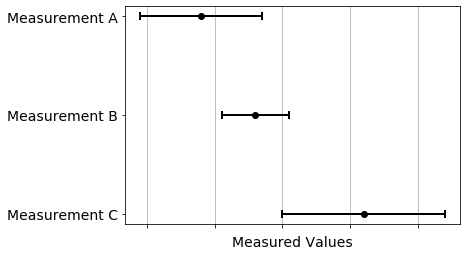

In [71]:
##Comparing measuremnets

meas = [7.34, 7.38, 7.46]
err = [.045, .025, .06]

heights = [1, 0.5, 0]

lw = 2
fs = 14

ytick_labels = ['Measurement A',
               'Measurement B',
               'Measurement C']

fig, ax = plt.subplots()

ax.errorbar(meas, heights, xerr = err, ls = '', color = 'black', fmt = 'o',
           linewidth = lw,
            capsize = 4, capthick = lw)

ax.set_yticks(heights)
ax.set_yticklabels(ytick_labels, fontsize = fs)

ax.set_xticklabels([])
ax.set_xlabel('Measured Values', fontsize = fs)

ax.grid(True, axis = 'x')

plt.show()

In this case we can say that the results of measurements A and B **agree within their stated experimental uncertainties**, as do B and C, however B and C **do not agree** with each other.

## References
{% bibliography --cited %}